### Components of time series  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

**Introduction:** 

The four components of time series, we will consider here, are the trend, seasonality, offset, and noise (white/colored). We use simulated data to show these components here. The observation equation of time series should have the following mathematical representation:

$$Y(t) = y_0 + r t + a \cos(\omega_0t) + b\sin(\omega_0t) + o {u_k(t)} + \epsilon(t)= y_0 + r t + A \sin(\omega_0 t+\phi_0) + o {u_k(t)} + \epsilon(t)$$

where
- $y_0 $: intercept (e.g. in mm)
- $r$: is the rate (e.g. in mm/day)
- $a$ and $b$ are the coefficients of the periodic signal 
- $\omega_0$ is the frequency of signal (e.g. cycle/ day)
- $o$ is the size of the offset at time instant $t_k$
- $u_k(t)$ is the unit step function which is 1 if $t_k \leq t$ and 0 otherwise
- $\epsilon(t)$ is the random noise with a given variance which follows a Normal distribution: $ \epsilon(t) \sim \textbf{N}(0, \sigma^2)$

Here, we are assuming only a single seasonality and offset component. However, in many practical scenarios, there could be multiple components related to these.

**Exercise:**

You can simulate your time series based on the priori information provided in the scripts. Plot your results and change the input variables to see the effect.

*The noise follows a normal distribution: use np.random.normal in order to draw random samples from a normal (Gaussian) distribution. Study more for this function [here](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html)*.

We will first create the time series $Y(t)=y_0+rt$, with $y_0=1$ mm and $r=0.02$ mm/day with a duration of 500 days (i.e., time series consists of 500 observations).

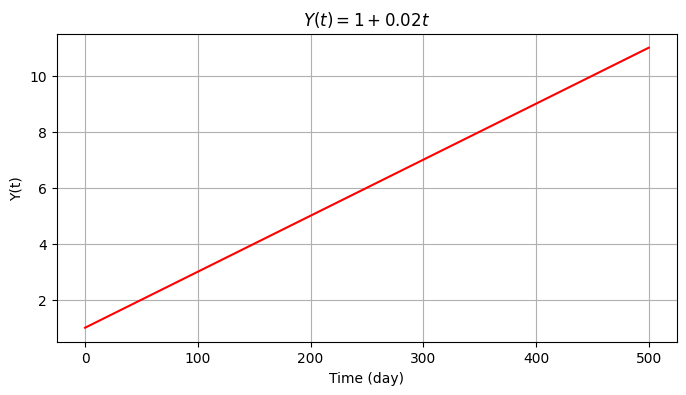

In [7]:
np.random.seed(0)  # For reproducibility

time = np.arange(501) 
m = len(time)
y_0 = 1 
r = 0.02 
y1 = y_0 + r*time 

plt.figure(figsize=(8,4))
plt.grid()
plt.plot(time, y1, color='red')
plt.ylabel('Y(t)')
plt.xlabel('Time (day)')
plt.title('$Y(t) = 1 + 0.02 t $');

We then introduce seasonality to the data with a sine signal $s(t)=A sin(\omega t + \phi_0)$ with $\omega=2\pi f$, frequency $f=0.01$ cycle/day (i.e., 1 cycle per 100 days), amplitude $A=1$ mm and initial phase $\phi_0=0.2\pi$ rad.

Text(0.5, 1.0, '$Y(t) = 1 + 0.02 t + sin(0.02πt + 0.2π)$')

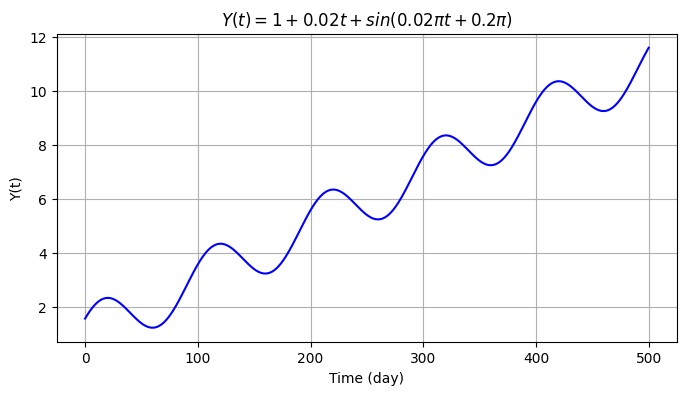

In [3]:
omega = 2 * np.pi/100 
A = 1 
phi_0 = 0.2*np.pi 
y2 = y1 + A*np.sin(omega * time + phi_0) 

plt.figure(figsize=(8,4))
plt.grid()
plt.plot(time, y2, color='blue')
plt.ylabel('Y(t)')
plt.xlabel('Time (day)')
plt.title('$Y(t) = 1 + 0.02 t + sin(0.02πt + 0.2π)$');

We now add an offset $o_k=5$ at $t=300$ days. We therefore create a copy of the previous signal and store it into a new array.

Text(0.5, 1.0, '$Y(t) = 1 + 0.02 t + sin(0.02πt + 0.2π) + 5 u_{300}(t)$')

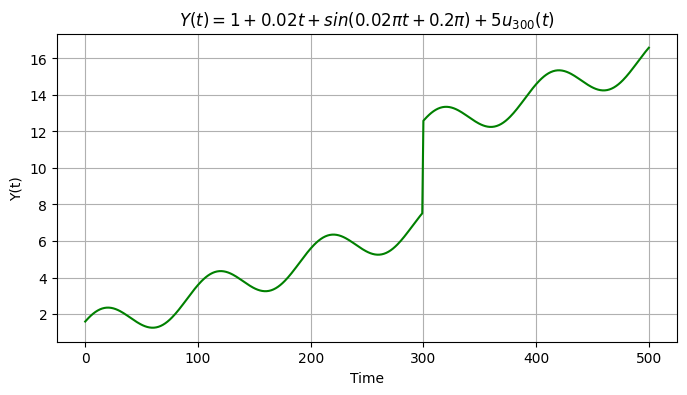

In [4]:
t_k = 300 
O_k = 5 
y3 = y2.copy() 
y3[t_k:] = y3[t_k:] + O_k

plt.figure(figsize=(8,4))
plt.grid()
plt.plot(time, y3, color='g')
plt.ylabel('Y(t)')
plt.xlabel('Time')
plt.title('$Y(t) = 1 + 0.02 t + sin(0.02πt + 0.2π) + 5 u_{300}(t)$');

Eventually we include the random error $\epsilon \sim \textbf{N}(\mu, \sigma_e)$ with $\mu=0$ mm and $\sigma_e=0.5$ mm. 

Text(0.5, 1.0, '$Y(t) = 1 + 0.02 t + sin(0.02πt + 0.2π) + 5 u_{300}(t) + N(0,0.5^2)$')

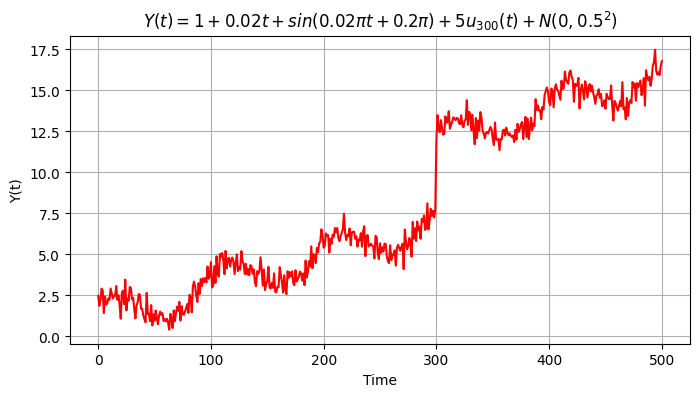

In [5]:
mean = 0 
sigma = 0.5 
et = np.random.normal(loc = mean, scale = sigma, size = m) 
y4 = y3 + et 

plt.figure(figsize=(8,4))
plt.grid()
plt.plot(time, y4, color='red')
plt.ylabel('Y(t)')
plt.xlabel('Time')
plt.title('$Y(t) = 1 + 0.02 t + sin(0.02πt + 0.2π) + 5 u_{300}(t) + N(0,0.5^2)$');